## Introduction

This notebook is designed to develop a machine learning model for the detection of ovarian cancer. The main aim of this project is to utilise various machine learning methods. The code is organized into several sections.

1. [The Data Wrangling section](#data_wrang) preprocesses the dataset to transform raw data into a clean dataset suitable for training the machine learning model.
2. [The Preliminary Data Analysis section](#data_anal) explores the provided dataset and performs basic statistical analysis to better understand the data.
3. [The Feature Engineering section](#feature) extracts relevant features from the data to improve the accuracy of the model.
4. [The Model Training section](#training) trains the machine learning model using several ensemble learning algorithms and evaluates their performance based on various metrics.
5. [The Analysis of Ensemble Methods section](#model_anal) analyzes the factors that contribute to the performance of the selected ensemble learning algorithm.
6. Additionally, the code includes [an Explainable AI section](#xai) that uses various methods to interpret the machine learning model and provide insights into its decision-making process.

In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# 这段注释说明此Python 3环境预装了许多有用的分析库
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# 它由kaggle/python Docker镜像定义，链接为https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# 例如，这里有几个有用的包需要加载

# 导入numpy库，别名设置为np
# numpy是用于线性代数相关操作的库
import numpy as np # linear algebra 
# 导入pandas库，别名设置为pd
# pandas用于数据处理以及CSV文件的输入输出（例如使用pd.read_csv读取CSV文件）
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 再次导入pandas库，存在重复导入（一般情况下这是不必要的，可删除多余导入）
import pandas as pd 
# 导入seaborn库，用于数据可视化，常与matplotlib配合使用
import seaborn as sns 
# 导入matplotlib的pyplot模块，用于绘制各种图表
import matplotlib.pyplot as plt 

# Input data files are available in the read - only "../input/" directory
# 输入数据文件位于只读的"../input/"目录中
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# 例如，运行此代码（通过点击运行或按Shift + Enter）将列出输入目录下的所有文件

# 导入os库，用于与操作系统进行交互
import os 
# 使用os.walk函数遍历指定目录（"../00原始数据/archive"）
# dirname为当前目录路径，_ 为目录下的子目录名（这里未使用，用下划线表示忽略），filenames为目录下的文件名列表
for dirname, _, filenames in os.walk('../00原始数据/archive'):
    # 遍历当前目录下的所有文件名
    for filename in filenames:
        # 打印当前文件的完整路径
        # os.path.join函数用于将目录路径和文件名拼接成完整路径
        print(os.path.join(dirname, filename)) 
# 这是一个尝试安装mrmr_selection库的命令，但注释掉了
# 若要执行安装，需移除前面的!和注释符号
#!pip install mrmr_selection

../00原始数据/archive\Supplementary data 1.xlsx
../00原始数据/archive\Supplementary data 2.xlsx
../00原始数据/archive\Supplementary data 3.xlsx
../00原始数据/archive\Supplementary data 4.xlsx
../00原始数据/archive\Supplementary data 5.xlsx


In [113]:
# Pandas display options for easy viewing of dataframes
# 这一行代码用于设置Pandas库中数据框的显示选项，目的是为了更方便地查看数据框
# 设置Pandas数据框的显示宽度为150个字符
# 这有助于在显示数据框时避免列被截断，使数据展示更完整
pd.set_option('display.width', 150)


In [8]:
!pwd

/e/JA/github_blogs/blogs-master/04文献阅读/03妇产科/02卵巢癌/01使用机器学习预测卵巢癌/03代码实操


In [114]:
# Reading the dataset
# 此段代码的目的是读取数据集
# 使用pandas库的read_excel函数从指定路径的Excel文件中读取数据
# 路径为'../00原始数据/archive/Supplementary data 1.xlsx'
# sheet_name指定读取名为'All Raw Data'的工作表
# dtype参数指定数据类型全部为字符串
cancer_data = pd.read_excel('../00原始数据/archive/Supplementary data 1.xlsx', sheet_name='All Raw Data', dtype=str)
# Remove trailing whitespace from all string columns
# 此段代码用于移除所有字符串列的尾部空白字符
# 使用apply方法对cancer_data数据框的每一列应用一个匿名函数
# 如果列的数据类型是对象（字符串类型），则使用str.rstrip方法移除字符串末尾的空白字符；否则返回原列数据
# 然后将处理后的数据重新赋值给cancer_data
cancer_data = cancer_data.apply(lambda x: x.str.rstrip() if x.dtype == "object" else x)


In [115]:
# Printing the first 5 rows of the data
print(cancer_data.head())

  SUBJECT_ID    AFP     AG Age   ALB ALP ALT AST BASO# BASO%  ...   NEU   PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA
0          1   3.58  19.36  47  45.4  56  11  24  0.01   0.3  ...  76.2  0.09  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4
1          2  34.24  23.98  61  39.9  95   9  13  0.02   0.3  ...  76.5   0.3  11.2  1.09  304  4.89  12.7   6.8    72  119.2
2          3   1.50   18.4  39  45.4  77   9  18  0.03   0.6  ...  69.7  0.13  15.2  0.97  112  4.62    12  14.8  77.9  209.2
3          4   2.75   16.6  45  39.2  26  16  17  0.05  0.74  ...  65.5  0.25  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6
4          5   2.36  19.97  45    35  47  21  27  0.01   0.1  ...  59.5  0.28  11.9  0.94  272   4.4  13.4   5.3  66.5    206

[5 rows x 51 columns]


In [18]:
# Printing the shape of the data
# 此段代码的功能是打印数据的形状
# 使用print函数输出cancer_data数据框的形状 
# 数据框的形状以元组形式表示，第一个元素是行数，第二个元素是列数
print(cancer_data.shape)

(349, 51)


In [116]:
# Printing the summary statistics of the data
# 这段代码的目的是打印数据的摘要统计信息
# 使用print函数输出cancer_data数据框的相关信息
# cancer_data.info() 方法会返回数据框的基本信息，包括每列的数据类型、非空值的数量等
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  349 non-null    object
 1   AFP         327 non-null    object
 2   AG          348 non-null    object
 3   Age         349 non-null    object
 4   ALB         339 non-null    object
 5   ALP         339 non-null    object
 6   ALT         339 non-null    object
 7   AST         339 non-null    object
 8   BASO#       349 non-null    object
 9   BASO%       349 non-null    object
 10  BUN         349 non-null    object
 11  Ca          349 non-null    object
 12  CA125       332 non-null    object
 13  CA19-9      325 non-null    object
 14  CA72-4      109 non-null    object
 15  CEA         327 non-null    object
 16  CL          349 non-null    object
 17  CO2CP       348 non-null    object
 18  CREA        349 non-null    object
 19  TYPE        349 non-null    object
 20  DBIL      

### Data Wrangling <a class="anchor" id="data_wrang"></a>

This section of the code is responsible for preparing the dataset for analysis by cleaning, transforming, and restructuring the data into a usable format. This section involves handling missing data, dealing with outliers, and transforming variables to ensure they meet the assumptions of the analysis method. The goal is to create a reliable dataset that maximizes accuracy when using machine learning algorithms. Data wrangling is a critical step in the data analysis process, as the accuracy of the results depends heavily on the quality of the dataset used.



In [ ]:
### Data Wrangling <a class="anchor" id="data_wrang"></a>
# 数据整理，定义一个标题名为“Data Wrangling”并带有一个锚点id为“data_wrang”

This section of the code is responsible for preparing the dataset for analysis by cleaning, transforming, and restructuring the data into a usable format. 
# 这段代码负责通过清洗、转换和将数据重新构造为可用格式，来为分析准备数据集。

This section involves handling missing data, dealing with outliers, and transforming variables to ensure they meet the assumptions of the analysis method. 
# 此部分包括处理缺失数据、处理异常值以及转换变量，以确保它们符合分析方法的假设条件。

The goal is to create a reliable dataset that maximizes accuracy when using machine learning algorithms. 
# 目标是创建一个可靠的数据集，以便在使用机器学习算法时能最大化准确率。 

Data wrangling is a critical step in the data analysis process, as the accuracy of the results depends heavily on the quality of the dataset used.
# 数据整理在数据分析过程中是一个关键步骤，因为结果的准确性在很大程度上取决于所使用数据集的质量。 


In [117]:
# Before converting column types, the column values should be handled for data inconsistency
# 在转换列数据类型之前，需要处理列值以解决数据不一致的问题
cancer_data.loc[cancer_data['AFP'] == '>1210.00', 'AFP'] = '1210.00'
# 使用loc方法在cancer_data数据框中找到‘AFP’列中值为‘>1210.00’的行 
# 并将这些行中‘AFP’列的值修改为‘1210.00’，以统一数据表示
cancer_data.loc[cancer_data['AFP'] == '>1210', 'AFP'] = '1210.00'
# 使用loc方法在cancer_data数据框中找到‘AFP’列中值为‘>1210’的行 
# 并将这些行中‘AFP’列的值修改为‘1210.00’，以统一数据表示
cancer_data.loc[cancer_data['CA125'] == '>5000.00', 'CA125'] = '5000.00'
# 使用loc方法在cancer_data数据框中找到‘CA125’列中值为‘>5000.00’的行 
# 并将这些行中‘CA125’列的值修改为‘5000.00’，以统一数据表示
cancer_data.loc[cancer_data['CA19-9'] == '>1000.00', 'CA19-9'] = '1000.00'
# 使用loc方法在cancer_data数据框中找到‘CA19-9’列中值为‘>1000.00’的行 
# 并将这些行中‘CA19-9’列的值修改为‘1000.00’，以统一数据表示
cancer_data.loc[cancer_data['CA19-9'] == '>1000', 'CA19-9'] = '1000.00'
# 使用loc方法在cancer_data数据框中找到‘CA19-9’列中值为‘>1000’的行 
# 并将这些行中‘CA19-9’列的值修改为‘1000.00’，以统一数据表示
cancer_data.loc[cancer_data['CA19-9'] == '<0.600', 'CA19-9'] = '0.5'
# 使用loc方法在cancer_data数据框中找到‘CA19-9’列中值为‘<0.600’的行 
# 并将这些行中‘CA19-9’列的值修改为‘0.5’，以统一数据表示

In [118]:
# Convert object columns to float columns
# 将对象类型的列转换为浮点型列
for col in cancer_data.drop('TYPE', axis=1).select_dtypes(include=['object']).columns:
    # 遍历cancer_data数据框中，排除'TYPE'列后，数据类型为'object'的列
    # drop('TYPE', axis=1) 表示删除名为'TYPE'的列，axis=1表示按列删除
    # select_dtypes(include=['object']) 用于选择数据类型为对象的数据列
    #.columns获取这些列的列名
    cancer_data[col] = cancer_data[col].astype('float')
    # 将每一个遍历到的列的数据类型转换为浮点型
    # 使用.astype('float')方法来进行数据类型转换

# Convert target column to integer
# 将目标列转换为整数类型
cancer_data['TYPE'] = cancer_data['TYPE'].astype('int64')
# 将cancer_data数据框中名为'TYPE'的列的数据类型转换为64位整数
# 使用.astype('int64')方法来进行数据类型转换

In [120]:
# Computing the ratio of missing data in each column
# 计算每列中缺失数据的比例
missing_ratio = cancer_data.isnull().mean()
# 使用cancer_data.isnull()方法，返回一个与cancer_data形状相同的布尔型数据框
# 其中缺失值位置为True，非缺失值位置为False
# 接着使用.mean()方法，计算每列中True值（即缺失值）的比例，得到每列的缺失数据比例
# 将结果存储在missing_ratio变量中

# Displaying the ratio of missing data in each column
# 显示每列中缺失数据的比例
print(missing_ratio)
# 使用print函数输出missing_ratio变量的值，
# 即打印出每列缺失数据的比例


SUBJECT_ID    0.000000
AFP           0.063037
AG            0.002865
Age           0.000000
ALB           0.028653
ALP           0.028653
ALT           0.028653
AST           0.028653
BASO#         0.000000
BASO%         0.000000
BUN           0.000000
Ca            0.000000
CA125         0.048711
CA19-9        0.068768
CA72-4        0.687679
CEA           0.063037
CL            0.000000
CO2CP         0.002865
CREA          0.000000
TYPE          0.000000
DBIL          0.028653
EO#           0.000000
EO%           0.000000
GGT           0.028653
GLO           0.028653
GLU.          0.000000
HCT           0.000000
HE4           0.057307
HGB           0.000000
IBIL          0.028653
K             0.000000
LYM#          0.000000
LYM%          0.000000
MCH           0.000000
MCV           0.000000
Menopause     0.000000
Mg            0.000000
MONO#         0.000000
MONO%         0.000000
MPV           0.005731
Na            0.000000
NEU           0.260745
PCT           0.005731
PDW        

In [121]:
# Before handling missing data, lets put the missing data in another variable to perform analysis on later
# 在处理缺失数据之前，我们将包含缺失数据的数据存到另一个变量中，以便后续进行分析
cancer_data_missing = cancer_data.copy()
# 复制cancer_data数据框，并将副本赋值给cancer_data_missing变量
# 这样可以在不改变原始数据（cancer_data）的情况下操作和分析缺失数据

# Dropping columns with a missing data ratio greater than 0.5
# 删除缺失数据比例大于0.5的列
#cols_to_drop = ['CA72-4', 'NEU']
cols_to_drop = ['CA72-4']
# 定义一个列表cols_to_drop，包含要删除的列名。这里只保留了'CA72-4'这一列要删除的数据列名
cancer_data = cancer_data.drop(cols_to_drop, axis = 1)
# 根据cols_to_drop列表，从cancer_data数据框中删除相应的列
# axis = 1 表示按列删除

# get columns with missing data
# 获取包含缺失数据的列
cols_with_missing = [col for col in cancer_data.columns if cancer_data[col].isnull().any()]
# 使用列表推导式遍历cancer_data数据框的每一列
# 如果某一列中存在任何缺失值（通过cancer_data[col].isnull().any()判断）
# 则将该列的列名添加到cols_with_missing列表中

# impute missing data with median value
# 用中位数填充缺失数据
for col in cols_with_missing:
    # 遍历包含缺失数据的列名列表cols_with_missing
    median_val = cancer_data[col].median()
    # 计算每列的中位数，并将其存储在median_val变量中
    cancer_data[col].fillna(median_val, inplace = True)
    # 使用计算出的中位数median_val填充cancer_data[col]列中的缺失值
    # inplace = True 表示直接在原始数据框的列上进行修改

# Displaying the updated missing data ratio
# 显示更新后的缺失数据比例
print(cancer_data.isnull().mean())
# 使用print函数输出cancer_data数据框每列的缺失数据比例
# cancer_data.isnull().mean() 先判断每列中的缺失值（True为缺失，False为非缺失）
# 然后计算每列中True值的比例，即为每列的缺失数据比例

SUBJECT_ID    0.0
AFP           0.0
AG            0.0
Age           0.0
ALB           0.0
ALP           0.0
ALT           0.0
AST           0.0
BASO#         0.0
BASO%         0.0
BUN           0.0
Ca            0.0
CA125         0.0
CA19-9        0.0
CEA           0.0
CL            0.0
CO2CP         0.0
CREA          0.0
TYPE          0.0
DBIL          0.0
EO#           0.0
EO%           0.0
GGT           0.0
GLO           0.0
GLU.          0.0
HCT           0.0
HE4           0.0
HGB           0.0
IBIL          0.0
K             0.0
LYM#          0.0
LYM%          0.0
MCH           0.0
MCV           0.0
Menopause     0.0
Mg            0.0
MONO#         0.0
MONO%         0.0
MPV           0.0
Na            0.0
NEU           0.0
PCT           0.0
PDW           0.0
PHOS          0.0
PLT           0.0
RBC           0.0
RDW           0.0
TBIL          0.0
TP            0.0
UA            0.0
dtype: float64


In [122]:
# also drop ID column
# 也删除ID列
cancer_data.drop('SUBJECT_ID', inplace=True, axis=1)
# 从cancer_data数据框中删除名为'SUBJECT_ID'的列
# inplace=True 表示直接在原数据框上进行操作，不返回新的数据框
# axis=1 表示按列删除


### Feature Engineering <a class="anchor" id="feature"></a>

This section of the code refers to the process of selecting and transforming the relevant features of the data to create new features that better represent the problem domain.The purpose of feature engineering is to improve the performance of machine learning algorithms by reducing the noise in the data, increasing the accuracy of the predictions, and making the model more interpretable. It requires a deep understanding of the problem domain and the data being used, as well as knowledge of the available feature engineering techniques and their impact on the model's performance.

In [25]:
# split data into features (X) and target (y)
# 将数据分割为特征(X)和目标(y)
cancer_X_train = cancer_data.drop('TYPE', axis=1)
# 从cancer_data数据框中删除名为'TYPE'的列
# 剩余的列作为特征数据，赋值给cancer_X_train变量
# axis=1 表示按列删除

cancer_y_train = cancer_data['TYPE']
# 从cancer_data数据框中提取名为'TYPE'的列
# 将该列作为目标数据，赋值给cancer_y_train变量


In [26]:
# select top 10 features using MRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=cancer_X_train, y=cancer_y_train, K=18)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 23.07it/s]


### Preliminary Data Analysis <a class="anchor" id="data_anal"></a>

This section of the code involves an initial examination of the dataset to understand its structure, contents, and quality. This includes checking for the extent of missing or erroneous data, exploring the distribution of the variables, identifying any outliers, and computing summary statistics. The purpose of this section is to gain insights into the dataset and inform subsequent data processing steps. It also involves visualizing the data using various plotting techniques to reveal patterns or relationships between the variables.

In [27]:
selected_features

['Age',
 'CEA',
 'IBIL',
 'NEU',
 'Menopause',
 'CA125',
 'ALB',
 'HE4',
 'GLO',
 'LYM%',
 'AST',
 'PLT',
 'HGB',
 'ALP',
 'LYM#',
 'PCT',
 'Ca',
 'CA19-9']

In [28]:
# Visualizing the correlation between the features in the training data
selected_cols = selected_features + ['TYPE']

# Selecting the row or column corresponding to the target column
target_corr = cancer_data[selected_cols].corr()['TYPE']

# Displaying the correlation values of each feature with the target column in descending order
print("Correlation of selected features with target column \n")
print(target_corr)

Correlation of selected features with target column 

Age         -0.514098
CEA         -0.164260
IBIL         0.200451
NEU         -0.353062
Menopause   -0.455770
CA125       -0.372262
ALB          0.375415
HE4         -0.350991
GLO         -0.195630
LYM%         0.315035
AST         -0.215888
PLT         -0.270182
HGB          0.197863
ALP         -0.213249
LYM#         0.256494
PCT         -0.243719
Ca           0.187119
CA19-9      -0.155981
TYPE         1.000000
Name: TYPE, dtype: float64


In [29]:
# Selecting the row or column corresponding to the target column
target_corr = cancer_data[selected_cols].corr()['TYPE']
target_corr = np.sqrt(target_corr ** 2) # find the magnitude of each correlation

# Displaying the correlation values of each feature with the target column in descending order
print(target_corr.sort_values(ascending=False))

TYPE         1.000000
Age          0.514098
Menopause    0.455770
ALB          0.375415
CA125        0.372262
NEU          0.353062
HE4          0.350991
LYM%         0.315035
PLT          0.270182
LYM#         0.256494
PCT          0.243719
AST          0.215888
ALP          0.213249
IBIL         0.200451
HGB          0.197863
GLO          0.195630
Ca           0.187119
CEA          0.164260
CA19-9       0.155981
Name: TYPE, dtype: float64


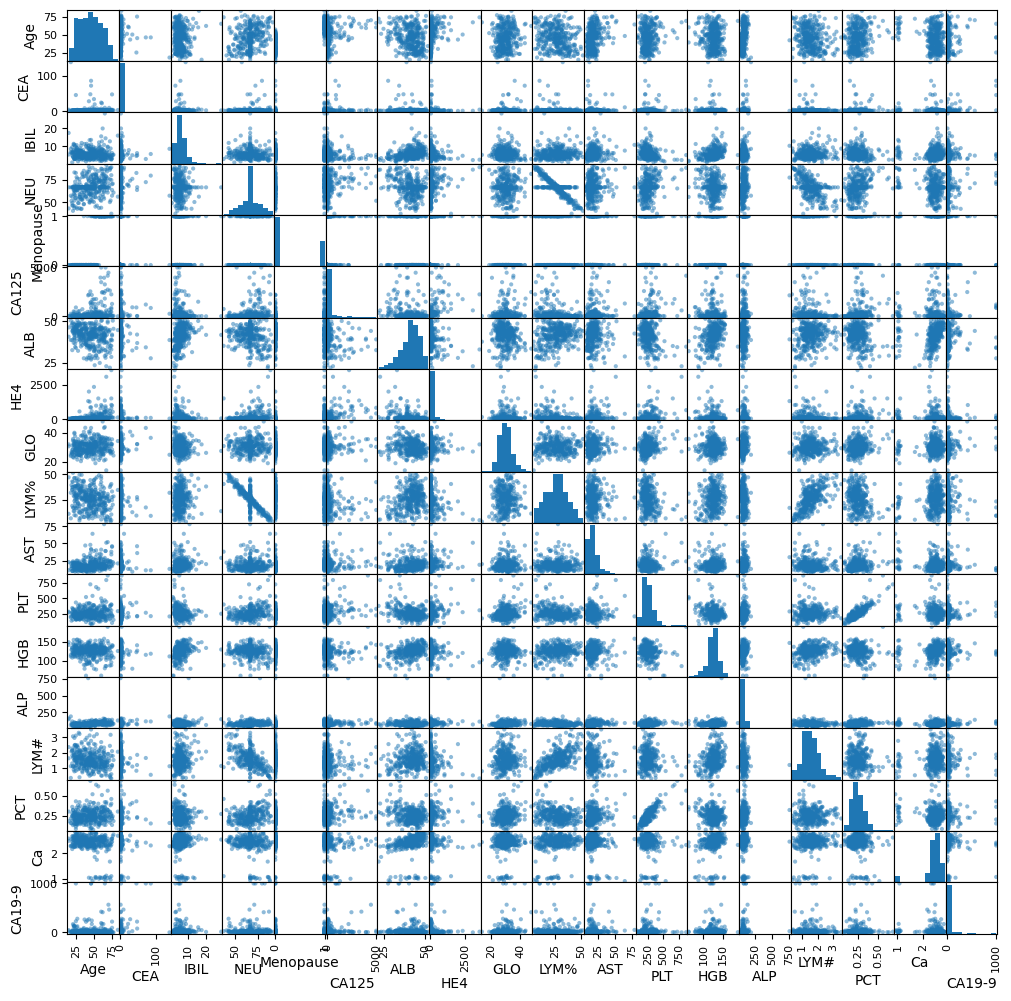

In [30]:
import matplotlib.pyplot as plt

# Create scatter plot matrix
pd.plotting.scatter_matrix(cancer_data[selected_features], figsize=(12, 12))
plt.show()

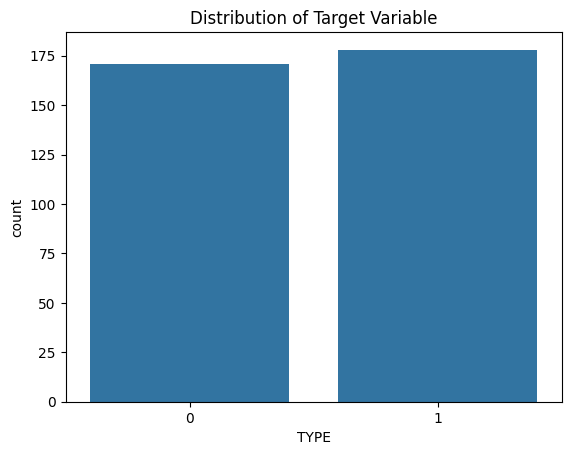

In [31]:
# Visualizing the distribution of the target variable in the training data
target_variable = cancer_data['TYPE']
sns.countplot(x=target_variable, data=cancer_data)
plt.title('Distribution of Target Variable')
plt.show()

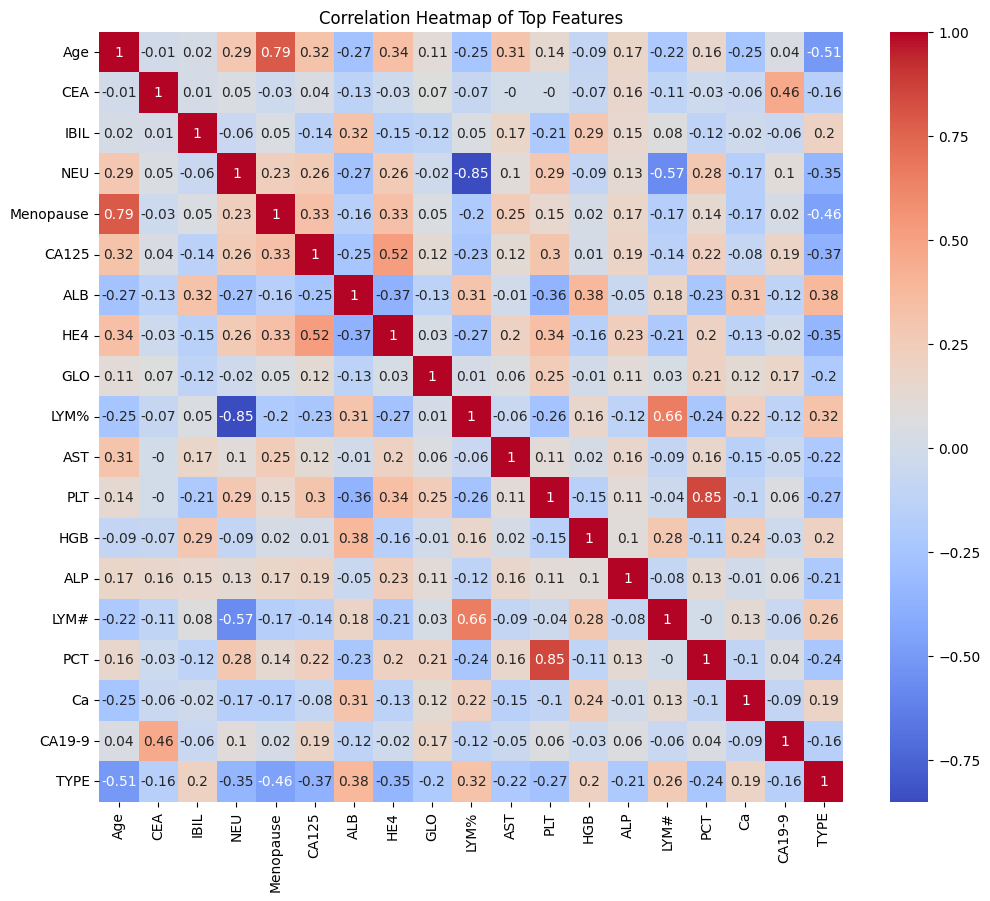

In [32]:
import seaborn as sns
# Create a correlation matrix
corr_matrix = np.around(cancer_data[selected_cols].corr(), 2)

# Plot the heatmap using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

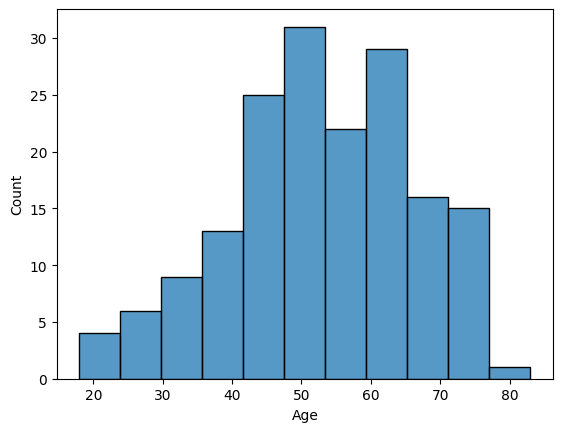

In [33]:
# Filter the data to only include positive values of the "TYPE" target column
positive_data = cancer_data[cancer_data['TYPE'] == 0]

# Create histogram using Seaborn
sns.histplot(data=positive_data, x="Age")

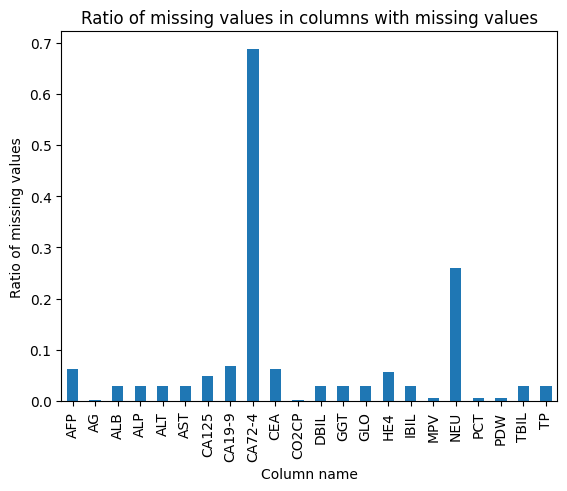

In [34]:
# calculate ratio of missing values in each column
missing_ratio = cancer_data_missing.isnull().sum() / len(cancer_data_missing)

# filter columns with missing values
missing_ratio = missing_ratio[missing_ratio > 0]

# plot the bar chart
missing_ratio.plot(kind='bar')
plt.title('Ratio of missing values in columns with missing values')
plt.xlabel('Column name')
plt.ylabel('Ratio of missing values')
plt.show()

### Model Training <a class="anchor" id="training"></a>

This section of the code involves using machine learning algorithms to build predictive models for detecting ovarian cancer. This section includes selecting appropriate algorithms and splitting the data into training and testing sets, training the models on the training data, and evaluating their performance on the testing data.

The goal of this section is to identify the most accurate and effective ensemble learning method(s) for detecting ovarian cancer. Ensemble learning is a machine learning technique that involves combining multiple models (called base models) to improve the overall performance and accuracy of predictions.

**Base Models Checked:**
1. SVM
2. KNN
3. Decision Trees

**Ensemble Learning Techniques Checked:**
1. Max Voting
2. Stacking
3. Bagging
4. Boosting
5. Stacking of Various Ensemble Learning Techniques

In [35]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(cancer_X_train, cancer_y_train, test_size=0.3, random_state=42)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [36]:
#  Create a dataframe to store the accuracy of base models for further analysis
basemodel_df = pd.DataFrame(columns=['Base Model', 'Accuracy'])

In [41]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 假设 X_train, y_train, X_test, y_test 已经定义
# 如果 basemodel_df 未定义，先初始化为空 DataFrame
basemodel_df = pd.DataFrame(columns=['Base Model', 'Accuracy'])

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicting the target values for test data
test_preds = svm_model.predict(X_test)

# Calculate accuracy
accuracy = svm_model.score(X_test, y_test)

# Append the result to the DataFrame
basemodel_df = pd.concat([basemodel_df, pd.DataFrame({'Base Model': ["SVM"], 'Accuracy': [accuracy]})], ignore_index=True)

# Evaluate the model on the test set
print("SVM:")
print(classification_report(y_test, test_preds))

SVM:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        53
           1       0.83      0.87      0.85        52

    accuracy                           0.85       105
   macro avg       0.85      0.85      0.85       105
weighted avg       0.85      0.85      0.85       105



In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

# 假设 X_train, y_train, X_test, y_test 已经定义
# 如果 basemodel_df 未定义，先初始化为空 DataFrame
if 'basemodel_df' not in locals():
    basemodel_df = pd.DataFrame(columns=['Base Model', 'Accuracy'])

# create KNN classifier
knn = KNeighborsClassifier()
# train the model
knn.fit(X_train, y_train)

# Predicting the target values for test data
test_preds = knn.predict(X_test)

# Calculate accuracy
accuracy = knn.score(X_test, y_test)

# Append the result to the DataFrame using pd.concat
basemodel_df = pd.concat([basemodel_df, pd.DataFrame({'Base Model': ["KNN"], 'Accuracy': [accuracy]})], ignore_index=True)

# evaluate the model on the test set
print("KNN:")
print(classification_report(y_test, test_preds))

KNN:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        53
           1       0.73      0.85      0.79        52

    accuracy                           0.77       105
   macro avg       0.78      0.77      0.77       105
weighted avg       0.78      0.77      0.77       105



In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# 假设 X_train, y_train, X_test, y_test 已经定义
# 如果 basemodel_df 未定义，先初始化为空 DataFrame
if 'basemodel_df' not in locals():
    basemodel_df = pd.DataFrame(columns=['Base Model', 'Accuracy'])

# create decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# fit the model to the training data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = clf.score(X_test, y_test)

# Append the result to the DataFrame using pd.concat
basemodel_df = pd.concat([basemodel_df, pd.DataFrame({'Base Model': ["Decision Tree"], 'Accuracy': [accuracy]})], ignore_index=True)

# evaluate the model on the test set
print("Decision Trees:")
print(classification_report(y_test, y_pred))

Decision Trees:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        53
           1       0.84      0.79      0.81        52

    accuracy                           0.82       105
   macro avg       0.82      0.82      0.82       105
weighted avg       0.82      0.82      0.82       105



In [49]:
from sklearn.metrics import accuracy_score

#  Create a dataframe to store the accuracy of ensemble models for further analysis
ensemble_df = pd.DataFrame(columns=['Ensemble Model', 'Accuracy'])

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Assuming svm_model, knn, clf, X_train, y_train, X_test, y_test are already defined

# Making the final model using voting classifier
vote_model = VotingClassifier(estimators=[('svc', svm_model), ('knn', knn), ('tree', clf)], voting='hard')

# Training all the models on the train dataset
vote_model.fit(X_train, y_train)

# Predicting the output on the test dataset
pred_final = vote_model.predict(X_test)

# Calculating the accuracy
accuracy = vote_model.score(X_test, y_test)

# Creating a new DataFrame to append to ensemble_df
new_row = pd.DataFrame({'Ensemble Model': ["Max Voting"], 'Accuracy': [accuracy]})

# Using concat to append the new row to ensemble_df
ensemble_df = pd.concat([ensemble_df, new_row], ignore_index=True)

# Evaluate the model on the test set
print("Max Voting:")
print(classification_report(y_test, pred_final))

Max Voting:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        53
           1       0.83      0.87      0.85        52

    accuracy                           0.85       105
   macro avg       0.85      0.85      0.85       105
weighted avg       0.85      0.85      0.85       105



In [53]:
# ! pip install vecstack

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=1964ed8d8597034da6d31ad29daa9d4940c69f6524cb762ad86123808bfd6273
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\2d\b3\7c\92dae05f1ba55777f8f28b461d8733a23fb94a63ef5bde618b
Successfully built vecstack


In [55]:
from vecstack import stacking
from sklearn.metrics import accuracy_score, classification_report

# Assuming svm_model, clf, knn, X_train, y_train, X_test, y_test are already defined

# Putting all base model objects in one list
all_models = [svm_model, clf, knn]

# Computing the stack features
s_train, s_test = stacking(all_models,                     # list of models
                           X_train, y_train, X_test,       # data
                           regression=False,               # classification task (if you need regression - set to True)
                           n_folds=5,                      # number of folds
                           shuffle=False,                  # shuffle the data
                           random_state=None,              # ensure reproducibility
                           verbose=1)                      # print all info

# Initializing the second-level model
final_model = clf

# Fitting the second level model with stack features
final_model = final_model.fit(s_train, y_train)

# Predicting the final output using stacking
pred_final = final_model.predict(s_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, pred_final)

# Creating a new DataFrame to append to ensemble_df
new_row = pd.DataFrame({'Ensemble Model': ["Stacking"], 'Accuracy': [accuracy]})

# Using concat to append the new row to ensemble_df
ensemble_df = pd.concat([ensemble_df, new_row], ignore_index=True)

# Evaluate the model on the test set
print("Stacking:")
print(classification_report(y_test, pred_final))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVC]
    ----
    MEAN:     [0.81113946] + [0.05545391]
    FULL:     [0.81147541]

model  1:     [DecisionTreeClassifier]
    ----
    MEAN:     [0.79923469] + [0.04700805]
    FULL:     [0.79918033]

model  2:     [KNeighborsClassifier]
    ----
    MEAN:     [0.79506803] + [0.04284229]
    FULL:     [0.79508197]

Stacking:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        53
           1       0.81      0.88      0.84        52

    accuracy                           0.84       105
   macro avg       0.84      0.84      0.84       105
weighted avg       0.84      0.84      0.84       105



In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize the ensemble DataFrame
ensemble_df = pd.DataFrame(columns=['Ensemble Model', 'Accuracy'])

# Initialize the base model (SVC in this case)
svm_model = SVC(probability=True)  # Ensure probability=True if you need predict_proba

# Initialize the bagging model using SVC as the base model
bag_model = BaggingClassifier(estimator=svm_model, n_estimators=10, random_state=42)

# Train the model
bag_model.fit(X_train, y_train)

# Predict the output on the test dataset
pred = bag_model.predict(X_test)
pred = np.around(pred).astype("int64")  # Convert probabilities to labels

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred)

# Create a new DataFrame to append to ensemble_df
new_row = pd.DataFrame({'Ensemble Model': ["Bagging"], 'Accuracy': [accuracy]})

# Use concat to append the new row to ensemble_df
ensemble_df = pd.concat([ensemble_df, new_row], ignore_index=True)

# Evaluate the model on the test set
print("Bagging:")
print(classification_report(y_test, pred))

Bagging:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74        53
           1       0.72      0.88      0.79        52

    accuracy                           0.77       105
   macro avg       0.79      0.77      0.77       105
weighted avg       0.79      0.77      0.77       105



In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, y_train, X_test, y_test are already defined

# Initializing the boosting module with default parameters
model = GradientBoostingClassifier()
xgb_model = XGBClassifier()

# Training the model on the train dataset
# model.fit(X_train, y_train)  # 如果需要训练 GradientBoostingClassifier，取消注释
xgb_model.fit(X_train, y_train)

# Predicting the output on the test dataset
pred_final = xgb_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, pred_final)

# Creating a new DataFrame to append to ensemble_df
new_row = pd.DataFrame({'Ensemble Model': ["Boosting"], 'Accuracy': [accuracy]})

# Using concat to append the new row to ensemble_df
ensemble_df = pd.concat([ensemble_df, new_row], ignore_index=True)

# Evaluate the model on the test set
print("Boosting:")
print(classification_report(y_test, pred_final))

Boosting:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.86      0.85      0.85        52

    accuracy                           0.86       105
   macro avg       0.86      0.86      0.86       105
weighted avg       0.86      0.86      0.86       105



In [77]:
from vecstack import stacking
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, y_train, X_test, y_test, xgb_model, vote_model, bag_model are already defined

# Putting all base model objects in one list
all_models = [xgb_model, vote_model, bag_model]

# Computing the stack features
s_train, s_test = stacking(all_models,                     # list of models
                           X_train, y_train, X_test,       # data
                           regression=False,               # classification task (if you need regression - set to True)
                           n_folds=5,                      # number of folds
                           shuffle=False,                  # shuffle the data
                           random_state=None,              # ensure reproducibility
                           verbose=1)                      # print all info

# Initializing the second-level model
final_model = XGBClassifier()

# Fitting the second level model with stack features
final_model.fit(s_train, y_train)

# Predicting the final output using stacking
pred_final = final_model.predict(s_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_final)

# Create a new DataFrame to append to ensemble_df
new_row = pd.DataFrame({'Ensemble Model': ["Ensemble Combination"], 'Accuracy': [accuracy]})

# Use concat to append the new row to ensemble_df
ensemble_df = pd.concat([ensemble_df, new_row], ignore_index=True)

# Evaluate the model on the test set
print("Ensemble Combination:")
print(classification_report(y_test, pred_final))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [XGBClassifier]
    ----
    MEAN:     [0.87295918] + [0.04158711]
    FULL:     [0.87295082]

model  1:     [VotingClassifier]
    ----
    MEAN:     [0.82772109] + [0.04820941]
    FULL:     [0.82786885]

model  2:     [BaggingClassifier]
    ----
    MEAN:     [0.79523810] + [0.07378366]
    FULL:     [0.79508197]

Ensemble Combination:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.88      0.85      0.86        52

    accuracy                           0.87       105
   macro avg       0.87      0.87      0.87       105
weighted avg       0.87      0.87      0.87       105



### Analysis of Ensemble Methods <a class="anchor" id="model_anal"></a>

This section of the code involves evaluating the performance of the ensemble learning methods used in the model training section, by using appropriate evaluation metrics and comparing the results. The purpose is to determine the most effective and efficient method for detecting ovarian cancer tumors and to identify the factors that contribute to the superior performance of a particular ensemble learning technique over others.

In [78]:
# select top 10 features using mRMR
from mrmr import mrmr_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(cancer_X_train, cancer_y_train, test_size=0.3, random_state=42)

In [81]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

# Assuming cancer_X_train, cancer_y_train, cancer_X_test, cancer_y_test are already defined

# Create a dataframe to store the accuracy and corresponding number of features
accuracy_df = pd.DataFrame(columns=['Number of Features', 'Accuracy'])

# Loop over the number of features and train decision tree models on each subset
for n in range(2, 49):
    # Select the first n features from the list of selected features
    subset_features = mutual_info_classif(cancer_X_train, cancer_y_train, n_neighbors=3, random_state=42)
    subset_features = subset_features.argsort()[-n:][::-1]  # Get top n features

    # Train a decision tree model on the selected subset of features
    model = DecisionTreeClassifier()
    model.fit(cancer_X_train.iloc[:, subset_features], cancer_y_train)
    
    # Evaluate the model on the test set and store the accuracy
    accuracy = model.score(cancer_X_test.iloc[:, subset_features], cancer_y_test)
    
    # Create a new DataFrame to append to accuracy_df
    new_row = pd.DataFrame({'Number of Features': [n], 'Accuracy': [accuracy]})
    
    # Use concat to append the new row to accuracy_df
    accuracy_df = pd.concat([accuracy_df, new_row], ignore_index=True)

# Print the resulting dataframe
print(accuracy_df)

   Number of Features  Accuracy
0                   2  0.714286
1                   3  0.771429
2                   4  0.828571
3                   5  0.790476
4                   6  0.761905
5                   7  0.723810
6                   8  0.761905
7                   9  0.733333
8                  10  0.800000
9                  11  0.752381
10                 12  0.742857
11                 13  0.733333
12                 14  0.714286
13                 15  0.790476
14                 16  0.742857
15                 17  0.780952
16                 18  0.819048
17                 19  0.780952
18                 20  0.752381
19                 21  0.828571
20                 22  0.780952
21                 23  0.780952
22                 24  0.790476
23                 25  0.752381
24                 26  0.771429
25                 27  0.742857
26                 28  0.780952
27                 29  0.742857
28                 30  0.790476
29                 31  0.771429
30      

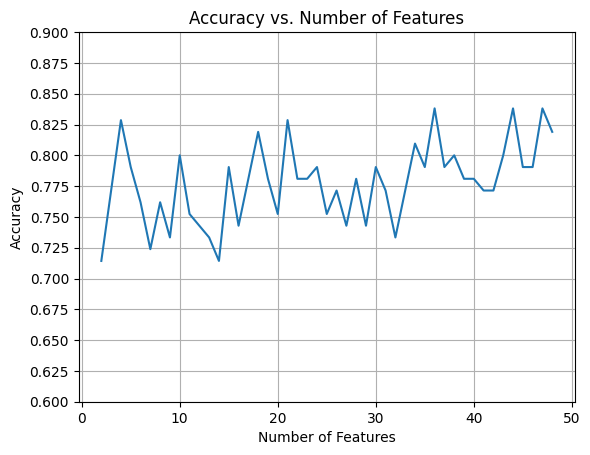

In [82]:
# plot the accuracy against number of features
plt.plot(accuracy_df['Number of Features'], accuracy_df['Accuracy'])
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.6, 0.9, 0.025))
plt.grid(True)
plt.show()

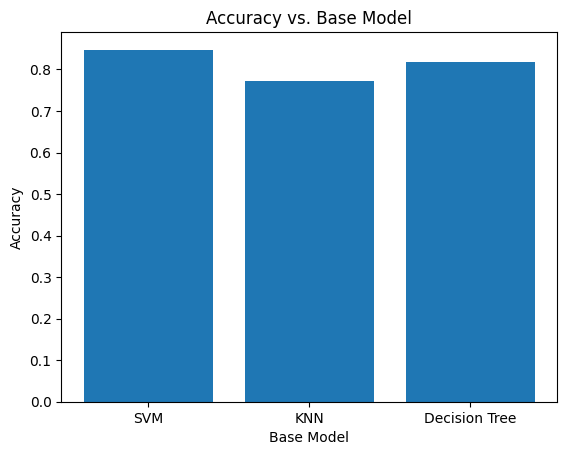

In [83]:
plt.bar(basemodel_df['Base Model'], basemodel_df['Accuracy'])
plt.title('Accuracy vs. Base Model')
plt.xlabel('Base Model')
plt.ylabel('Accuracy')
plt.show()

the SVM algorithm provided the best performancec among the 3. The major evaluation metric 
used for comparison was accuracy, which is the proportion of correctly classified instances.

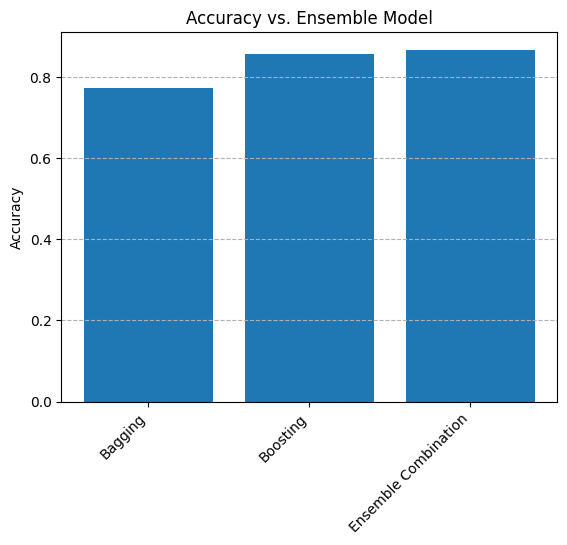

In [84]:
# create bar plot
fig, ax = plt.subplots()
ax.bar(ensemble_df['Ensemble Model'], ensemble_df['Accuracy'])

# set x-axis tick labels
ax.set_xticklabels(ensemble_df['Ensemble Model'], rotation=45, ha='right')

# add grid lines
ax.grid(axis='y', linestyle='--')

# add axis labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. Ensemble Model')

plt.show()

Even though the boosting method performed higher than the baseline models, it is discovered 
that an even higher performace can be gotten by combining the ensemble methods with one 
another.

### Explainable AI <a class="anchor" id="xai"></a>

This section of the code refers to the techniques and methods used to make machine learning models understandable to humans. It involves analyzing the model's inner workings and providing insights into how it makes predictions, allowing developers and stakeholders to understand and trust the model's output. By incorporating explainable AI techniques into the model, developers can ensure that it is not only accurate but also trustworthy and reliable.

XAI Techniques Used:
1. Feature Importance:
    * *eli5* Permutation Importance
    * SHAP Permutation Importance
2. Dependence Plots:
    * Partial Dependence Plot
    * SHAP Dependence Contribution Plot
3. SHAP Values Force Plot


### Feature Importance

Permutation importance is a method used to calculate the importance of each feature in a machine learning model. It involves permuting the values of a single feature in the dataset and then observing the effect on the model's accuracy. The feature that causes the largest decrease in accuracy when permuted is considered the most important feature.

In [86]:
# ! pip install eli5

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     -

In [89]:
# ! pip install --upgrade scikit-learn eli5

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [97]:
# ! pip install --upgrade shap

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     --------------------------------------- 0.0/14.8 MB 640.0 kB/s eta 0:00:24
     --------------------------------------- 0.0/14.8 MB 640.0 kB/s eta 0:00:24
     ---------------------------------------- 0.2/14.8 MB 1.0 MB/s eta 0:00:15
      --------------------------------------- 0.3/14.8 MB 1.4 MB/s eta 0:00:11
      --------------------------------------- 0.4/14.8 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.6/14.8 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/14.8 MB 2.6 MB/s eta 0:00:06
     -- ------------------------------------- 1.1/14.8 MB 3.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.4/14.8 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.7/14.8 MB 3.7 MB/s eta 0:00:

ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\Administrator\\AppData\\Roaming\\Python\\Python311\\site-packages\\~.mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.



In [98]:
# ! pip show shap

Name: shap
Version: 0.46.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [100]:
import eli5
from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Initialize PermutationImportance
perm = PermutationImportance(xgb_model, random_state=1)
perm.fit(X_test, y_test)

# Show permutation importance
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\metaestimators.py)

In [110]:
# eli5 Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance
model = xgb_model.fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\metaestimators.py)

In [109]:
import shap

ImportError: Numba needs NumPy 1.24 or less

In [94]:
# ! pip show shap

Name: shap
Version: 0.46.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [107]:
# ! pip uninstall numpy
# ! pip install numpy==1.24.0
# # ! pip install numpy==1.26.4
# # ! pip install numpy==1.24.4


^C
^C


In [108]:
# ! pip show numpy

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages
Requires: 
Required-by: arch, astropy, autograd, blosc2, bokeh, Bottleneck, category_encoders, cmdstanpy, contourpy, daal4py, datasets, datashader, datashape, ecos, eli5, folium, formulaic, gensim, geopandas, h5py, holoviews, hvplot, imagecodecs, ImageHash, imageio, imbalanced-learn, keras, librosa, lifelines, lightgbm, matplotlib, missingno, mkl-fft, mkl-random, ml-dtypes, mrmr-selection, numba, numexpr, opencv-python, osqp, pandas, pandas-profiling, patsy, phik, prophet, pyarrow, pyerfa, pyogrio, PyWavelets, qdldl, scikit-image, scikit-learn, scikit-survival, scipy, seaborn, shap, shapely, soxr, stanio, statsmodels, tables, tensorboard, tensorflow_intel, tifffile, transformers, vecstack, visions, xarray, xgboost


**SHAP permutation importance** is just like eli5's but this time it uses a summary plot to show it, giving more information than eli5's.

A summary plot is a visual representation of the SHAP permutation importance technique. It displays a list of the most important features in descending order, along with their respective SHAP values. The summary plot also includes a bar chart that shows the impact of each feature on the model's output, with positive values indicating that the feature contributes to higher predictions and negative values indicating the opposite. This helps to provide a clear and intuitive understanding of the relative importance of each feature in the model, and how it contributes to the final prediction.

In [93]:
# SHAP Permutation Importance

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

NameError: name 'shap' is not defined

### Dependence Plots

Dependence plots show how a single input feature affects the predicted output of a machine learning model while holding all other features constant. They provide insights into non-linear relationships and help to interpret the model.

In [111]:
# Partial Dependence Plot
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(model, X_test, ['Age']) #CA125 is mentioned a lot in research
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- AFP
- AG
- ALT
- BASO#
- BASO%
- ...


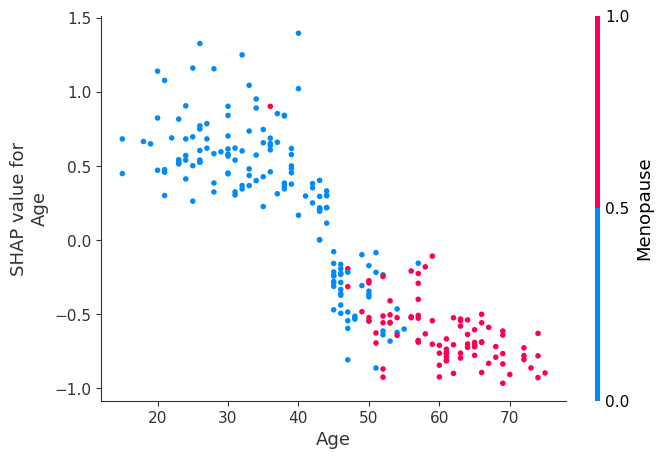

In [84]:
# SHAP Dependence Contribution Plot

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_train)

# make plot.
shap.dependence_plot('Age', shap_values, X_train, interaction_index="Menopause")

### SHAP Values Force Plot

SHAP values are based on the concept of Shapley values from cooperative game theory. They work by assigning a numerical value to each feature in a given prediction, which represents how much that feature contributed to the final prediction.

By examining a force plot, it is possible to see which features are pushing the prediction towards a certain outcome, and which features are pulling it in a different direction. This information can be used to gain insights into how the model is making predictions, and to identify which features are most important for a given observation.

In [86]:
row_to_show = 99
explainer = shap.TreeExplainer(model)
data_for_prediction = X_train.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction.values.reshape(1, -1))

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

In [87]:
row_to_show = 100
explainer = shap.TreeExplainer(model)
data_for_prediction = X_train.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction.values.reshape(1, -1))

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)